# Loading both the datasets and combining them into a single dataset.

In [1]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('d2.csv')  # First one (screenshot 1)
df2 = pd.read_csv('d1.csv')  # Second one (screenshot 2)

# Rename columns in df2 to match df1
df2 = df2.rename(columns={
    'Age_Mons': 'Age',
    'Family_mem_with_ASD': 'Family_ASD',
    'Class/ASD Traits ': 'Class'
})

# Convert Age from months to years
df2['Age'] = (df2['Age'] // 12).astype(int)

# Normalize Class values to lowercase "yes"/"no"
df1['Class'] = df1['Class'].str.strip().str.lower()
df2['Class'] = df2['Class'].str.strip().str.lower()

# Drop unnecessary columns in df2
drop_cols = ['Case_No', 'Qchat-10-Score', 'Ethnicity', 'Who completed the test']
df2 = df2.drop(columns=drop_cols, errors='ignore')

# Reorder columns to match df1 if needed
df2 = df2[df1.columns]

# Combine datasets
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jaundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,no
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,no
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,yes
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,yes
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,0,0,0,0,0,0,0,0,0,1,2,f,no,yes,no
7125,0,0,1,1,1,0,1,0,1,0,1,m,yes,no,yes
7126,1,0,1,1,1,1,1,1,1,1,1,m,yes,no,yes
7127,1,0,0,0,0,0,0,1,0,1,1,m,no,yes,no


In [2]:
combined_df.to_excel("combined_df.xlsx",index = False)

# Plotting the Data

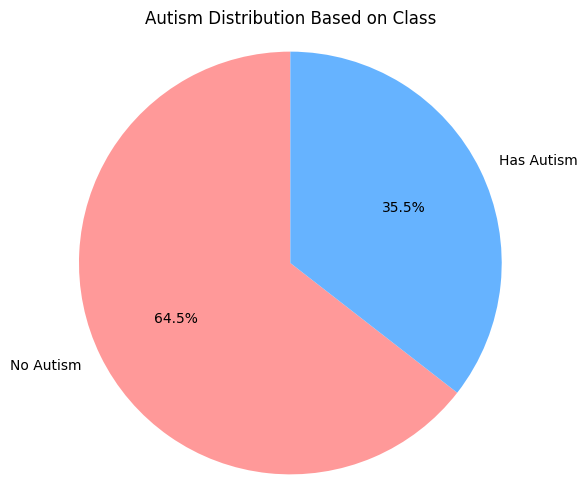

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
df = combined_df

# Normalize 'Class' column to lowercase just in case
df['Class'] = df['Class'].str.lower()

# Count the values
class_counts = df['Class'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=class_counts.index.map(lambda x: 'Has Autism' if x == 'yes' else 'No Autism'),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff']
)
plt.title('Autism Distribution Based on Class')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


### As we can see the data is still highly biased, So we need to normalize this data.

In [3]:
class_counts

Class
no     4597
yes    2532
Name: count, dtype: int64

# Applying Undersampling!!

In [4]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Class'] == 'no']
df_minority = df[df['Class'] == 'yes']

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # no bootstrapping
                                   n_samples=len(df_minority),  # match minority count
                                   random_state=42)

# Combine minority and downsampled majority
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


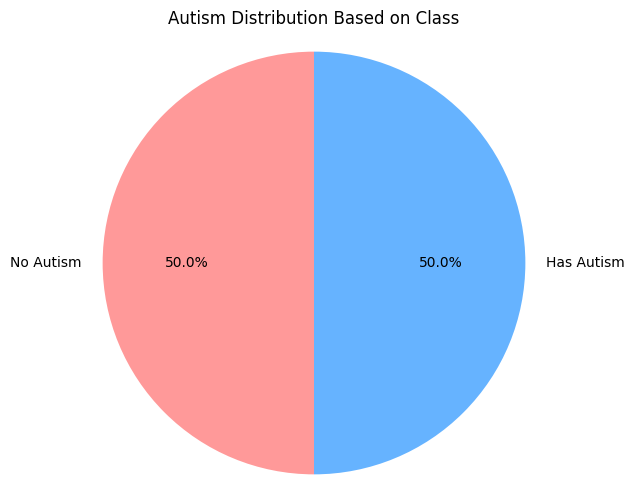

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
df = df_balanced

# Normalize 'Class' column to lowercase just in case
df['Class'] = df['Class'].str.lower()

# Count the values
class_counts = df['Class'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=class_counts.index.map(lambda x: 'Has Autism' if x == 'yes' else 'No Autism'),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff']
)
plt.title('Autism Distribution Based on Class')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


### Now we can see that our data is normalized.

In [6]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jaundice,Family_ASD,Class
0,1,1,1,1,1,1,1,1,1,0,1,m,no,yes,no
1,1,1,0,1,1,1,0,0,1,1,15,f,no,no,yes
2,1,1,1,1,1,0,1,0,0,1,44,f,no,no,yes
3,1,0,1,0,0,0,1,1,1,0,2,m,no,no,yes
4,1,1,1,1,0,0,0,1,0,0,37,f,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5059,0,1,1,1,1,0,1,0,1,1,1,m,no,no,yes
5060,0,0,1,0,1,0,0,0,0,0,5,m,no,no,no
5061,1,1,1,1,1,0,1,1,1,0,30,f,no,no,yes
5062,1,1,0,1,1,1,1,1,0,0,17,f,no,no,yes


In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Training the RF Model

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Load your dataset (assuming it's loaded into a DataFrame named 'df')
# df = pd.read_csv('path_to_your_file.csv')

# Assuming the DataFrame 'df' is like the one displayed in your screenshot
# Handle missing values if any (simple example, might need more complex handling)
df.fillna(method='ffill', inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['Sex', 'Jaundice', 'Family_ASD', 'Class']  # adjust as per your dataset
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define the feature columns and the target column
X = df.drop(['Class'], axis=1)
y = label_encoder.fit_transform(df['Class'])  # Encoding target labels

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Validate the model
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Test the model
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.8636363636363636
Test Accuracy: 0.834319526627219


In [9]:
class_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}

# Print the class mapping
print("Label mappings:", class_mapping)
print("Encoded labels:", y)

Label mappings: {0: 0, 1: 1}
Encoded labels: [0 1 1 ... 1 1 0]


Test Accuracy: 83.43%
['no', 'yes']
              precision    recall  f1-score   support

          no       0.84      0.82      0.83       249
         yes       0.83      0.85      0.84       258

    accuracy                           0.83       507
   macro avg       0.83      0.83      0.83       507
weighted avg       0.83      0.83      0.83       507



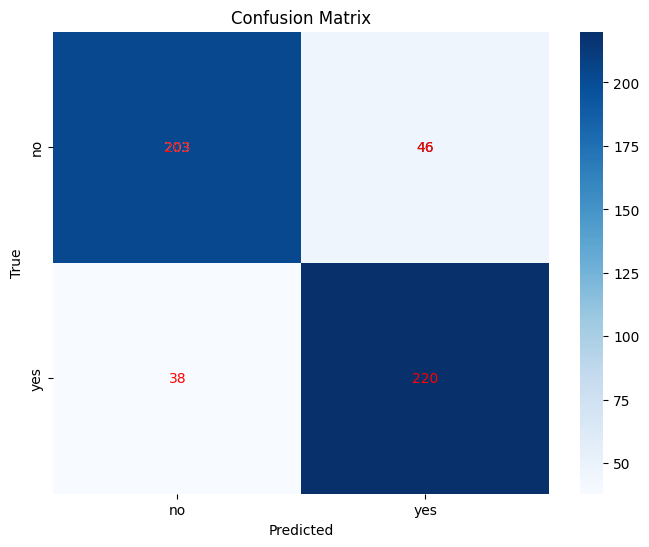

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print classification report
class_names = label_encoder.classes_  # This should correspond to ['No', 'Yes'] as encoded earlier
class_names = ['no' if name == 0 else 'yes' for name in class_names]
print(class_names)
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Plot the confusion matrix with correct and incorrect counts
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add labels with different colors if needed
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='red' if conf_matrix[i, j] > 0 else 'black')  # Change color based on condition

plt.show()

## As we can see that due to undersampling we have solved the problem of overfitting but still the accuracy we are getting is quite low.

Test Accuracy: 93.35%
              precision    recall  f1-score   support

          no       0.94      0.92      0.93      2532
         yes       0.92      0.95      0.93      2532

    accuracy                           0.93      5064
   macro avg       0.93      0.93      0.93      5064
weighted avg       0.93      0.93      0.93      5064



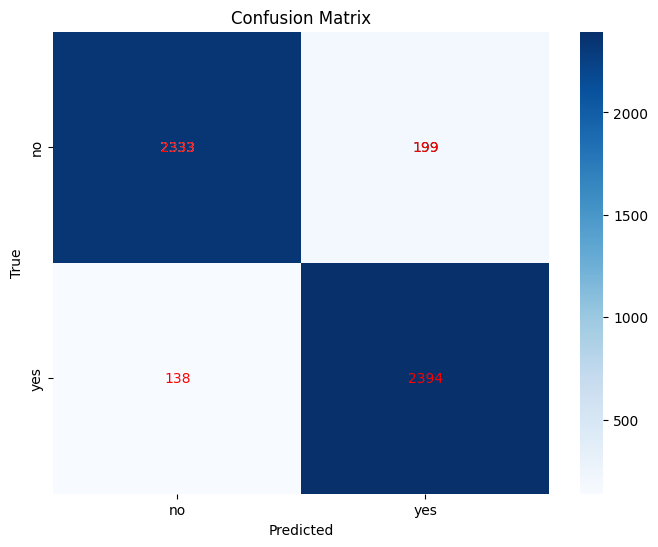

In [11]:
x_test = df.drop(['Class'], axis=1)
y_test = label_encoder.fit_transform(df['Class'])

y_test_pred = rf_model.predict(x_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print classification report
class_names = label_encoder.classes_  # This should correspond to ['No', 'Yes'] as encoded earlier
class_names = ['no' if name == 0 else 'yes' for name in class_names]
print(classification_report(y_test, y_test_pred, target_names=class_names))

# Plot the confusion matrix with correct and incorrect counts
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add labels with different colors if needed
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='red' if conf_matrix[i, j] > 0 else 'black')  # Change color based on condition

plt.show()

## This is the test accuracy when entire data is taken as test set!!

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2532
           1       0.92      0.95      0.93      2532

    accuracy                           0.93      5064
   macro avg       0.93      0.93      0.93      5064
weighted avg       0.93      0.93      0.93      5064

ROC AUC Score: 0.9334518167456556


## Now let's try to apply some more techniques to increase the accuracy of our RF classifier!!

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.combine import SMOTEENN

sme = SMOTEENN()
X_resampled, y_resampled = sme.fit_resample(X, y)


## So basically SMOTEENN is a hybrid resampling technique that first applies SMOTE to generate synthetic data points for the minority class using K-nearest neighbors, and then applies ENN to clean the dataset by removing ambiguous or noisy samples using nearest neighbor rules.

Cross-validation scores:
Accuracy: 0.9894
Precision: 0.9866
Recall: 0.9929
F1: 0.9897

Best Parameters from GridSearchCV: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       319
           1       0.99      0.99      0.99       340

    accuracy                           0.99       659
   macro avg       0.99      0.99      0.99       659
weighted avg       0.99      0.99      0.99       659

Confusion Matrix:
 [[315   4]
 [  2 338]]
ROC-AUC Score: 0.9907892310529228


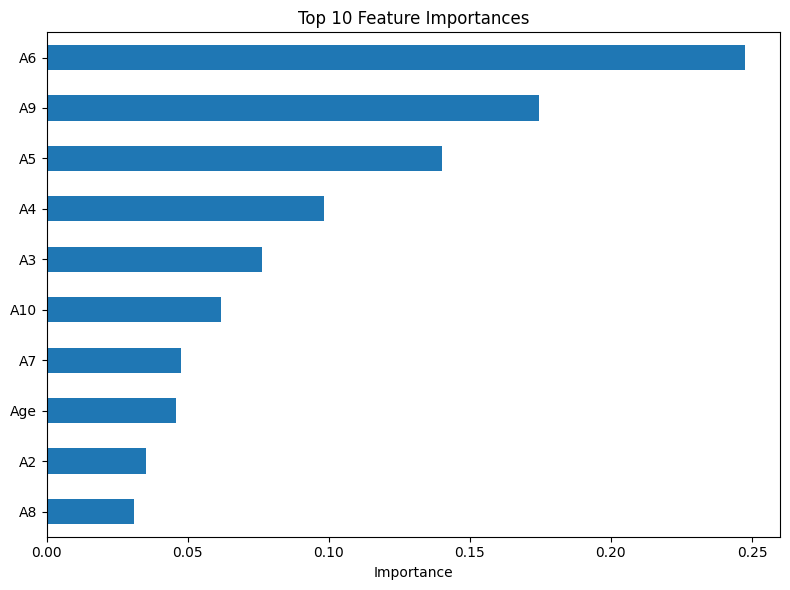

In [14]:
# 🔁 Step 2: Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 🤖 Step 3: Base model
model = RandomForestClassifier(random_state=42)

# 🧪 Step 4: Cross-validation scoring
cv_results = cross_validate(model, X_resampled, y_resampled, cv=cv, scoring=scoring)
print("Cross-validation scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.4f}")

# 🛠️ Step 5: Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_resampled, y_resampled)
print("\nBest Parameters from GridSearchCV:", grid.best_params_)

# 🧪 Step 6: Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 🧠 Step 7: Train best model
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# 📊 Step 8: Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# 📈 Step 9: Feature Importance
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top_features.plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## So here we do model training and evaluation using a Random Forest Classifier. First, we apply cross-validation and use `GridSearchCV` to find the best hyperparameters (`max_depth`, `min_samples_split`, `n_estimators`). The model is trained on **resampled data** to handle class imbalance and improve fairness. Once trained, we evaluate the model using **accuracy, precision, recall, F1-score**, and a **confusion matrix**. Finally, we visualize the **top 10 most important features** that contributed to the model’s predictions using a bar chart.


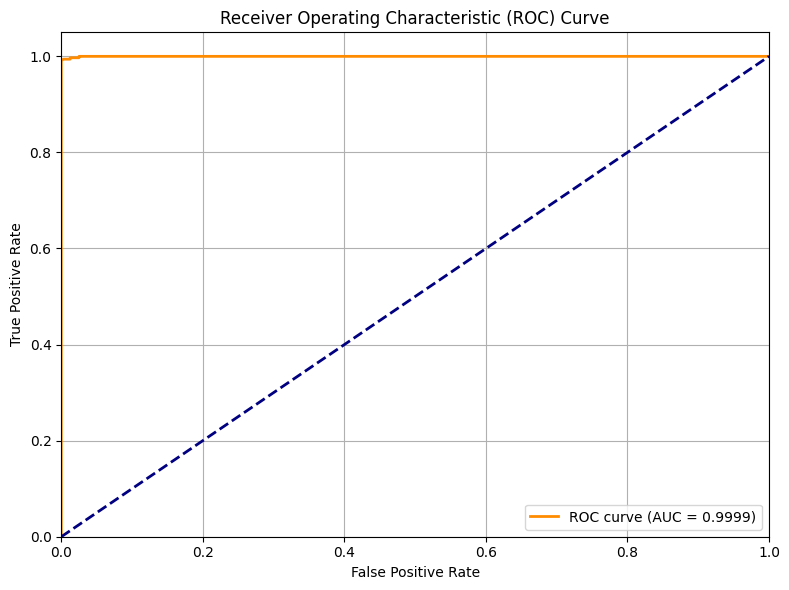

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 🧠 Get the predicted probabilities for the positive class (class 1)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 📈 Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 📊 Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


## Plotting the ROC Curve 👆

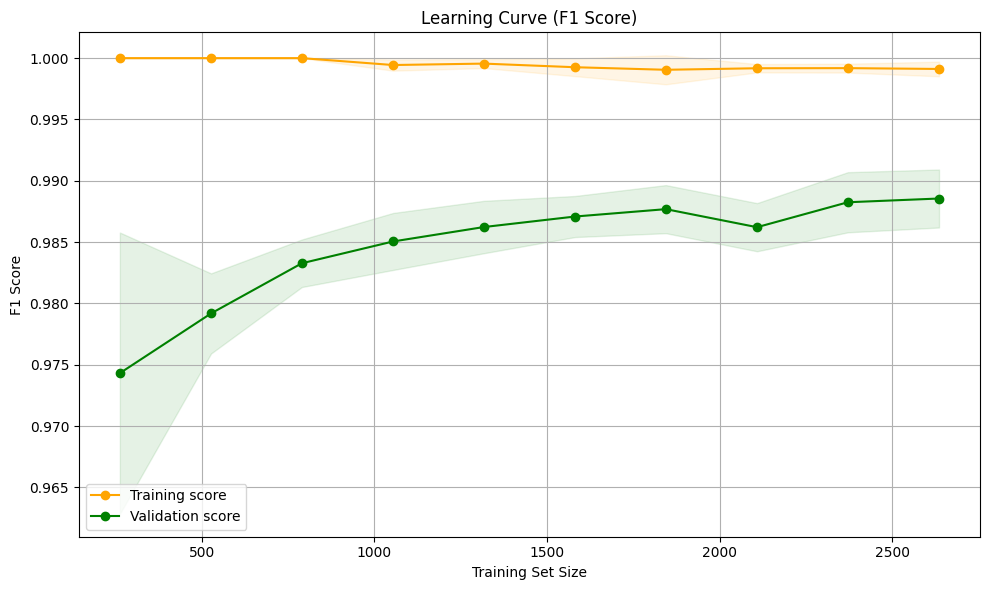

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 🧠 Use the best model parameters
model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100, random_state=42)

# ⚙️ Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_resampled, y_resampled,
    cv=5, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True, random_state=42
)

# 📈 Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# 🎨 Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='orange', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='orange')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='green')

plt.title("Learning Curve (F1 Score)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


 ### So here we **generate a learning curve** to understand how the model’s performance changes with varying training set sizes. Using the **best parameters** from the earlier grid search, we plot the **F1 scores** for both training and validation sets. The graph shows that the training score remains consistently high, indicating the model fits the training data very well. The validation score gradually improves and stabilizes as the training size increases, suggesting that the model is generalizing better with more data and is **not overfitting**. The small gap between the two curves and their stability confirms that the model is **well-trained and robust**.


In [17]:
# pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0
best_model

RandomForestClassifier(max_depth=20, random_state=42)

## Saving the Model!!

In [18]:
# After training
import joblib
joblib.dump(best_model, "autism_model.joblib")

print("Model saved successfully using joblib!")

Model saved successfully using joblib!
